**Join the data from Part 1 with the data from Part 2 to create a new dataframe.**

Given that I have not figure out how to automate sorting location types, and I don't really have time to manually wrangle the entire Yelp dataset at this point after all of Saturday ended up being wasted, I'm going to use the Foursquare data for this, even though it has less in it, both in term of returned locations and in terms of depth. Alas. 

I think I have to add a tangible 'station number' column to the bikes table first though. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
bikes = pd.read_csv('bike_stations.csv')
bikes.head(1)

,Unnamed: 0,station_id,name,latitude,longitude,timestamp,free_bikes,empty_slots,uid,number,slots,bike_uids
0,0,00a175b9694ce13c3b9bc9e1244e1612,Carlisle Circus,54.607397,-5.937086,2024-10-19T19:10:00.949278Z,1,20,20754306,3939,20.0,['830580']


In [3]:
locations = pd.read_csv('foursquare_locations.csv')
locations.head(1)

,Unnamed: 0,fsq_id,station_num,distance,name,location_address,categorized,closed_bucket
0,0,50ca5592e4b0cc5bad7c6449,1,557,The Sunflower,65 Union St,Bar,Unsure


In [4]:
yelp = pd.read_csv('yelp_locations.csv')

Clean up those 'Unnamed' columns and add the 'station_num' column to the Bikes table. (I also want a second station number that won't get converte to an index in the join, it turns out. Because trying to have the names of the stations on the charts is not ideal. )

In [5]:
bikes = bikes.drop('Unnamed: 0',axis=1)
locations = locations.drop('Unnamed: 0',axis=1)
bikes['station_num'] = [*range(1,58,1)]
bikes['Station_Number'] = [*range(1,58,1)]

In [6]:
locations.head(1)

,fsq_id,station_num,distance,name,location_address,categorized,closed_bucket
0,50ca5592e4b0cc5bad7c6449,1,557,The Sunflower,65 Union St,Bar,Unsure


In [7]:
bikes.tail(1)

,station_id,name,latitude,longitude,timestamp,free_bikes,empty_slots,uid,number,slots,bike_uids,station_num,Station_Number
56,fc6fb7a4026e37418578fdf54fdcb826,Elms Drive,54.576116,-5.942574,2024-10-19T19:10:00.951702Z,8,13,244525787,3983,20.0,"['830406', '830292', '830161', '830092', '8300...",57,57


In [8]:
print(bikes.shape)
print(locations.shape)

(57, 13)
(570, 7)


In [9]:
joined = locations.set_index('station_num').join(bikes.set_index('station_num'),lsuffix='_loc')

In [10]:
joined = joined[['Station_Number','station_id','name','latitude', 'longitude','timestamp', 'free_bikes', 'empty_slots', 'uid', 'number', 'slots','bike_uids',
        'fsq_id', 'distance', 'name_loc', 'location_address', 'categorized','closed_bucket']]
joined = joined.rename(columns={'name':'station_name', 'name_loc':'location_name'})

In [11]:
joined.head(1)

,Station_Number,station_id,station_name,latitude,longitude,timestamp,free_bikes,empty_slots,uid,number,slots,bike_uids,fsq_id,distance,location_name,location_address,categorized,closed_bucket
station_num,,,,,,,,,,,,,,,,,,
1,1,00a175b9694ce13c3b9bc9e1244e1612,Carlisle Circus,54.607397,-5.937086,2024-10-19T19:10:00.949278Z,1,20,20754306,3939,20.0,['830580'],50ca5592e4b0cc5bad7c6449,557,The Sunflower,65 Union St,Bar,Unsure


In [12]:
# joined.to_csv('joined_for_regression.csv',index=False)

In [13]:
joined[joined['location_name']=="Kelly's Cellars"]

,Station_Number,station_id,station_name,latitude,longitude,timestamp,free_bikes,empty_slots,uid,number,slots,bike_uids,fsq_id,distance,location_name,location_address,categorized,closed_bucket
station_num,,,,,,,,,,,,,,,,,,
1,1,00a175b9694ce13c3b9bc9e1244e1612,Carlisle Circus,54.607397,-5.937086,2024-10-19T19:10:00.949278Z,1,20,20754306,3939,20.0,['830580'],4b64a08bf964a52082c32ae3,920,Kelly's Cellars,30-32 Bank St,Restaurant,Unsure
2,2,036a91020ad7f40ea0d2bfda0fb14400,City Hall,54.597177,-5.930825,2024-10-19T19:10:00.949430Z,15,6,20754767,3902,20.0,"['830439', '830436', '830325', '830313', '8303...",4b64a08bf964a52082c32ae3,284,Kelly's Cellars,30-32 Bank St,Restaurant,Unsure
5,5,0bcde9e962503960bbf3c1940e63be23,Europa Bus Station / Blackstaff Square,54.594821,-5.933116,2024-10-19T19:10:00.949545Z,4,7,20755396,3910,12.0,"['830071', '830705', '830625', '830589']",4b64a08bf964a52082c32ae3,536,Kelly's Cellars,30-32 Bank St,Restaurant,Unsure
10,10,38c115f757ddfb8932019674ceaae244,Millfield / Divis Street,54.599697,-5.936308,2024-10-19T19:10:00.949822Z,8,8,20756044,3920,18.0,"['830320', '830266', '830253', '830083', '8300...",4b64a08bf964a52082c32ae3,266,Kelly's Cellars,30-32 Bank St,Restaurant,Unsure
11,11,3d074080544e9de7221eefa71e2a9c19,Carrick Hill / St Patricks Church,54.604986,-5.932853,2024-10-19T19:10:00.949316Z,3,6,20754490,3915,12.0,"['830255', '830149', '830075']",4b64a08bf964a52082c32ae3,597,Kelly's Cellars,30-32 Bank St,Restaurant,Unsure
16,16,4f1193645719ac9f73ec068cb9c520ca,Castle Place / Royal avenue,54.599358,-5.929838,2024-10-19T19:10:00.949346Z,2,15,20754573,3912,22.0,"['830606', '830564']",4b64a08bf964a52082c32ae3,152,Kelly's Cellars,30-32 Bank St,Restaurant,Unsure
21,21,63749ff4c0e10b00b94ec6671f02cbf5,St Georges Market / Cromac Square,54.595255,-5.923680,2024-10-19T19:10:00.951287Z,0,10,20756545,3906,12.0,[''],4b64a08bf964a52082c32ae3,730,Kelly's Cellars,30-32 Bank St,Restaurant,Unsure
25,25,68b7969cfee863bfe67f77f04114a706,Waterfront,54.597270,-5.921116,2024-10-19T19:10:00.951434Z,14,6,20756762,3908,24.0,"['830438', '830257', '830194', '830131', '8300...",4b64a08bf964a52082c32ae3,757,Kelly's Cellars,30-32 Bank St,Restaurant,Unsure
26,26,6bf6e588dec71ba0846a28656aa849f5,Falls Road,54.599399,-5.947595,2024-10-19T19:10:00.949577Z,4,5,20755478,3941,8.0,"['830368', '830107', '830509', '830707']",4b64a08bf964a52082c32ae3,993,Kelly's Cellars,30-32 Bank St,Restaurant,Unsure


I

There are multiple returns for that pub, but all of them are from different stations, so everything is still working fine. 

**Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization.**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

Comparing the distribution of each type of location, before and after dropping locations returned for more than one station. 

In [15]:
vis1 = joined.drop_duplicates('fsq_id')['categorized']

In [16]:
x = joined['categorized']
y = vis1

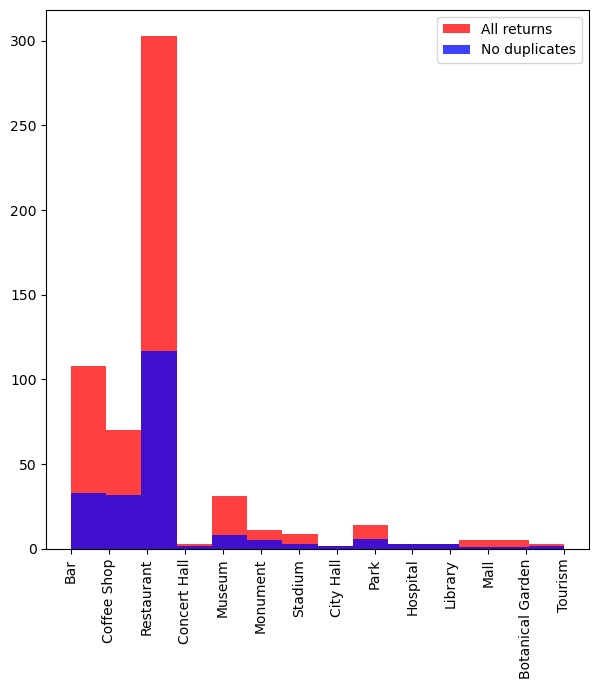

In [17]:
plt.figure(figsize=(7,7))
plt.hist(x,bins=14,color='red',label='All returns',alpha=.75)
plt.xticks(rotation=90)

plt.hist(y,bins=14,color='blue',label='No duplicates', alpha=.75)
plt.xticks(rotation=90)

plt.legend()

# plt.savefig('C:/Users/mebar/Documents/LHL-DataSci/Projects/python-project-datasci/images/location_cleaning_hist.png',bbox_inches='tight')

This makes it very obvious that there are a lot of locations that were returned by multiple stations. 

I also wanted to have a look at the ration of available bikes to empty slots at each station, which was a bit of a problem with 57 stations, so it's broken up into four graphs.

In [18]:
vis2=joined[['Station_Number','free_bikes','empty_slots']].loc[0:15].drop_duplicates()
vis2_stations=list(vis2['Station_Number'])
vis2_free=list(vis2['free_bikes'])
vis2_empty=list(vis2['empty_slots'])

In [19]:
categories = vis2_stations
groupa = vis2_free
groupb = vis2_empty

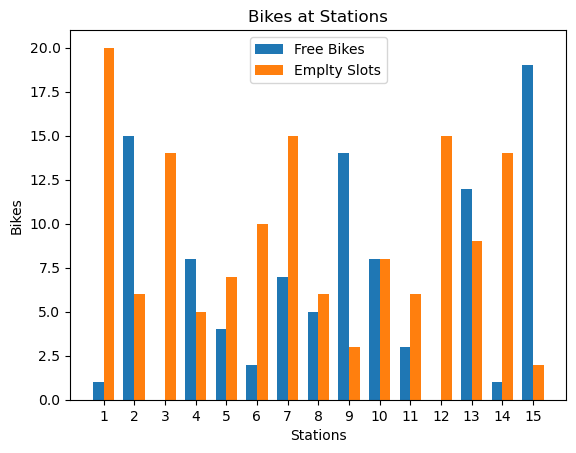

In [20]:
bar_width = 0.35
x = np.arange(len(categories)) 

fig, ax = plt.subplots()

group_a_bars = plt.bar(x - bar_width/2, groupa, bar_width, label='Free Bikes')
group_b_bars = plt.bar(x + bar_width/2, groupb, bar_width, label='Emplty Slots')

ax.set_xlabel('Stations')
ax.set_ylabel('Bikes')
ax.set_title('Bikes at Stations')
ax.set_xticks(x)
ax.set_xticklabels(categories)
plt.legend()

# plt.savefig('C:/Users/mebar/Documents/LHL-DataSci/Projects/python-project-datasci/images/bikes_v_slots_1')

In [21]:
vis3=joined[['Station_Number','free_bikes','empty_slots']].loc[16:30].drop_duplicates()
vis3_stations=list(vis3['Station_Number'])
vis3_free=list(vis3['free_bikes'])
vis3_empty=list(vis3['empty_slots'])

In [22]:
categories = vis3_stations
groupa = vis3_free
groupb = vis3_empty

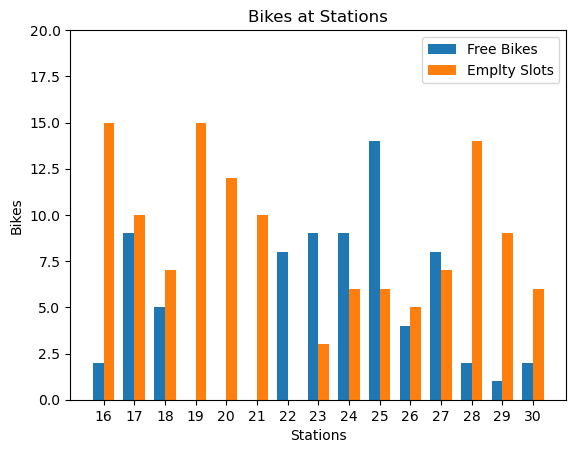

In [23]:
bar_width = 0.35
x = np.arange(len(categories)) 

fig, ax = plt.subplots()

group_a_bars = plt.bar(x - bar_width/2, groupa, bar_width, label='Free Bikes')
group_b_bars = plt.bar(x + bar_width/2, groupb, bar_width, label='Emplty Slots')

ax.set_xlabel('Stations')
ax.set_ylabel('Bikes')
ax.set_title('Bikes at Stations')
ax.set_xticks(x)
ax.set_xticklabels(categories)
plt.ylim(0,20)
plt.legend()

# plt.savefig('C:/Users/mebar/Documents/LHL-DataSci/Projects/python-project-datasci/images/bikes_v_slots_2')

In [24]:
vis4=joined[['Station_Number','free_bikes','empty_slots']].loc[31:45].drop_duplicates()
vis4_stations=list(vis4['Station_Number'])
vis4_free=list(vis4['free_bikes'])
vis4_empty=list(vis4['empty_slots'])

In [25]:
categories = vis4_stations
groupa = vis4_free
groupb = vis4_empty

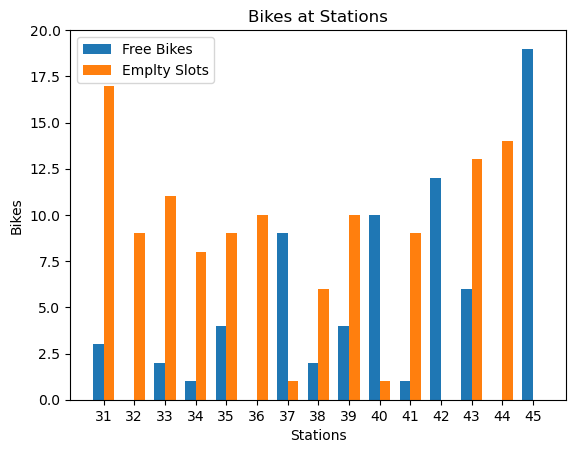

In [26]:
bar_width = 0.35
x = np.arange(len(categories)) 

fig, ax = plt.subplots()

group_a_bars = plt.bar(x - bar_width/2, groupa, bar_width, label='Free Bikes')
group_b_bars = plt.bar(x + bar_width/2, groupb, bar_width, label='Emplty Slots')

ax.set_xlabel('Stations')
ax.set_ylabel('Bikes')
ax.set_title('Bikes at Stations')
ax.set_xticks(x)
ax.set_xticklabels(categories)
plt.ylim(0,20)
plt.legend()

# plt.savefig('C:/Users/mebar/Documents/LHL-DataSci/Projects/python-project-datasci/images/bikes_v_slots_3')

In [27]:
vis5=joined[['Station_Number','free_bikes','empty_slots']].loc[45:].drop_duplicates()
vis5_stations=list(vis5['Station_Number'])
vis5_free=list(vis5['free_bikes'])
vis5_empty=list(vis5['empty_slots'])

In [28]:
categories = vis5_stations
groupa = vis5_free
groupb = vis5_empty

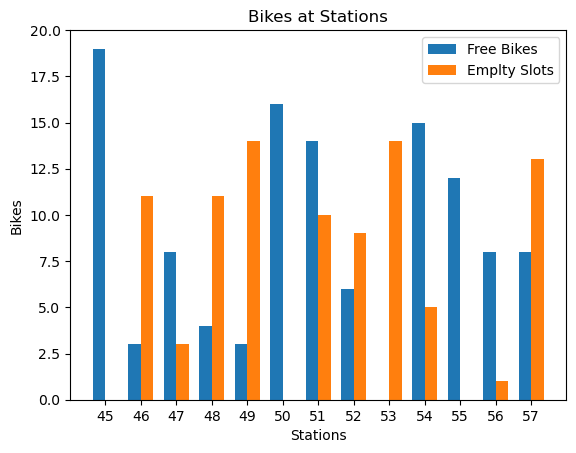

In [29]:
bar_width = 0.35
x = np.arange(len(categories)) 

fig, ax = plt.subplots()

group_a_bars = plt.bar(x - bar_width/2, groupa, bar_width, label='Free Bikes')
group_b_bars = plt.bar(x + bar_width/2, groupb, bar_width, label='Emplty Slots')

ax.set_xlabel('Stations')
ax.set_ylabel('Bikes')
ax.set_title('Bikes at Stations')
ax.set_xticks(x)
ax.set_xticklabels(categories)
plt.ylim(0,20)
plt.legend()

# plt.savefig('C:/Users/mebar/Documents/LHL-DataSci/Projects/python-project-datasci/images/bikes_v_slots_4')

For the record, this is why I broke it up:

In [30]:
vis6=joined[['Station_Number','free_bikes','empty_slots']].drop_duplicates()
vis6_stations=list(vis6['Station_Number'])
vis6_free=list(vis6['free_bikes'])
vis6_empty=list(vis6['empty_slots'])

In [31]:
categories = vis6_stations
groupa = vis6_free
groupb = vis6_empty

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22'),
 Text(22, 0, '23'),
 Text(23, 0, '24'),
 Text(24, 0, '25'),
 Text(25, 0, '26'),
 Text(26, 0, '27'),
 Text(27, 0, '28'),
 Text(28, 0, '29'),
 Text(29, 0, '30'),
 Text(30, 0, '31'),
 Text(31, 0, '32'),
 Text(32, 0, '33'),
 Text(33, 0, '34'),
 Text(34, 0, '35'),
 Text(35, 0, '36'),
 Text(36, 0, '37'),
 Text(37, 0, '38'),
 Text(38, 0, '39'),
 Text(39, 0, '40'),
 Text(40, 0, '41'),
 Text(41, 0, '42'),
 Text(42, 0, '43'),
 Text(43, 0, '44'),
 Text(44, 0, '45'),
 Text(45, 0, '46'),
 Text(46, 0, '47'),
 Text(47, 0, '48'),
 Text(48, 0, '49'),
 Text(49, 0, '50'),
 Text(50, 0, '51'),

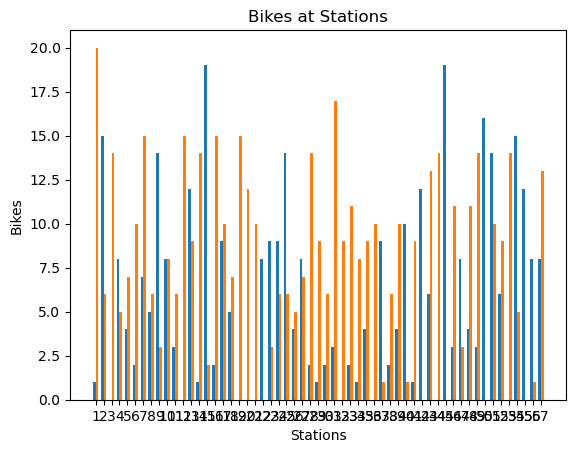

In [32]:
bar_width = 0.35
x = np.arange(len(categories)) 

fig, ax = plt.subplots()

group_a_bars = plt.bar(x - bar_width/2, groupa, bar_width, label='Free Bikes')
group_b_bars = plt.bar(x + bar_width/2, groupb, bar_width, label='Emplty Slots')

ax.set_xlabel('Stations')
ax.set_ylabel('Bikes')
ax.set_title('Bikes at Stations')
ax.set_xticks(x)
ax.set_xticklabels(categories)
# plt.savefig('C:/Users/mebar/Documents/LHL-DataSci/Projects/python-project-datasci/images/bad_graph.png')

While the mess of an overview is alright for seeing an _overview,_ its also impossible anything close to individual results. And making it bigger doesn't help. 

In [33]:
vis7_dict = {
    "Station_Number": joined.drop_duplicates('Station_Number')['Station_Number'],
    "mean_distance": joined.groupby('Station_Number').mean('distance')['distance'],
    "max_distance": joined.groupby('Station_Number').max('distance')['distance'],
    "min_distance": joined.groupby('Station_Number').min('distance')['distance']
}
vis7 = pd.DataFrame(vis7_dict)

I tried to put all of the free bikes vs empty slots charts on one subplot grid, but I couldn't get the second one to use the x-axis labels for the stations without using<ul>
fix, ax = plt.subplots</ul>
which completely broke everything.

Text(0.5, 0, 'Stations')

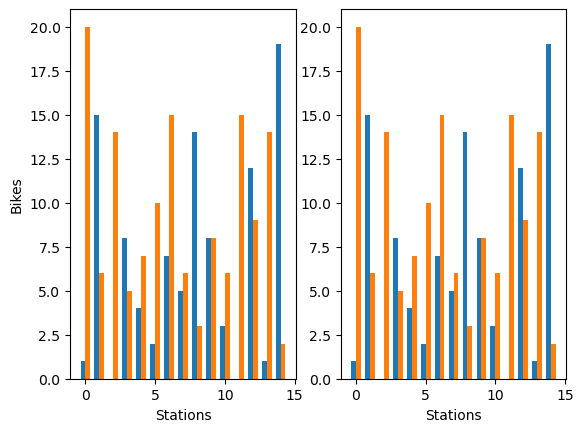

In [34]:
#chart 1
categories1 = vis2_stations
x_labels = categories1
x1 = np.arange(len(categories1))
groupa = vis2_free
groupb = vis2_empty
#chart 2
categories2 = vis3_stations
x2 = np.arange(len(categories2))
groupc = vis3_free
groupd = vis3_empty
#chart 3
categories1 = vis4_stations
# x3 = np.arange(len(categories3))
# groupe = vis4_free
# groupf = vis4_empty
# #chart 4
# categories4 = vis5_stations
# x4 = np.arange(len(categories4))
# groupg = vis5_free
# grouph = vis5_empty

bar_width = .35

plt.subplot(1,2,1)
group_a_bars = plt.bar(x1 - bar_width/2, groupa, bar_width, label='Free Bikes')
group_b_bars = plt.bar(x1 + bar_width/2, groupb, bar_width, label='Emplty Slots')
plt.xlabel('Stations')
plt.ylabel('Bikes')

plt.subplot(1,2,2)
group_c_bars = plt.bar(x2 - bar_width/2, groupa, bar_width, label='Free Bikes')
group_d_bars = plt.bar(x2 + bar_width/2, groupb, bar_width, label='Emplty Slots')
x_labels = categories2
plt.xlabel('Stations')
# plt.savefig('C:/Users/mebar/Documents/LHL-DataSci/Projects/python-project-datasci/images/attempted_graph_group.png')


The labels are theoretically supposed to be pulling from the categories, but they aren't. So individual ones it is, unfortunately. 

Comparing the mean, max and min distance of returned locations from the station they returned on between each station:

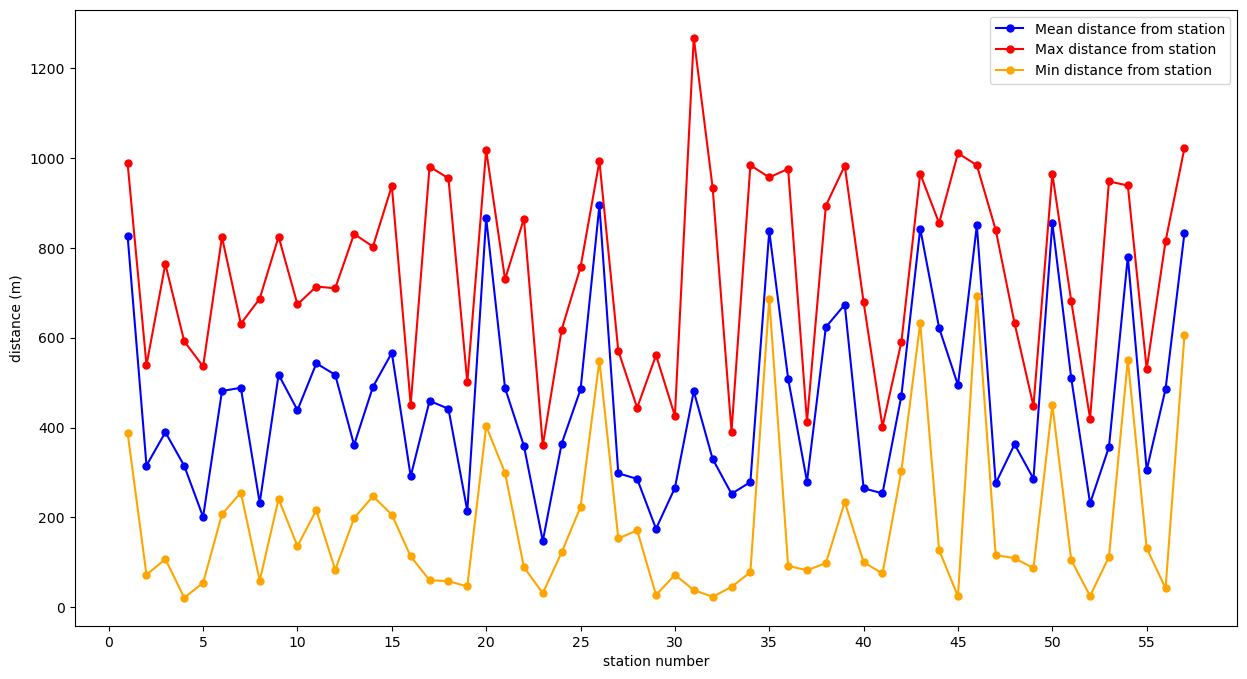

In [35]:
x = vis7['Station_Number']
a = vis7['mean_distance']
b = vis7['max_distance']
c = vis7['min_distance']

plt.figure(figsize=(15,8))

plt.plot(x,a, 'blue', label="Mean distance from station", linewidth=1.5, marker='o', markersize=5)
plt.plot(x,b, 'red', label="Max distance from station", linewidth=1.5, marker='o', markersize=5)
plt.plot(x,c, 'orange', label="Min distance from station", linewidth=1.5, marker='o', markersize=5)

plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55])
plt.xlabel('station number')
plt.ylabel('distance (m)', rotation=90)

plt.legend()

# plt.savefig('C:/Users/mebar/Documents/LHL-DataSci/Projects/python-project-datasci/images/distance_from_station.png')

Most of them have a similar shape between the 3 lines, but there's a couple with relative outliers; 31's max is technically outside the search radius, and I wonder if it was only returned to match the limit of 10 per station. 

I decided I wanted to actually **see** a breakdown of what type of locations came back for each station in a stacked bar graph and it was. So bad. Alex helped me with the coding for this one. I only used some of his actual code but he did most of the poking it until it cooperated while I caught up on other parts, and then explained how it worked so I could make it look exactly how I wanted it. Very excellent of him. 

In [36]:
dummies = pd.get_dummies(joined['categorized'],dtype=int)
added_dummies = pd.concat([joined['Station_Number'],dummies],axis=1)

In [37]:
vis8 = added_dummies.groupby('Station_Number').sum()

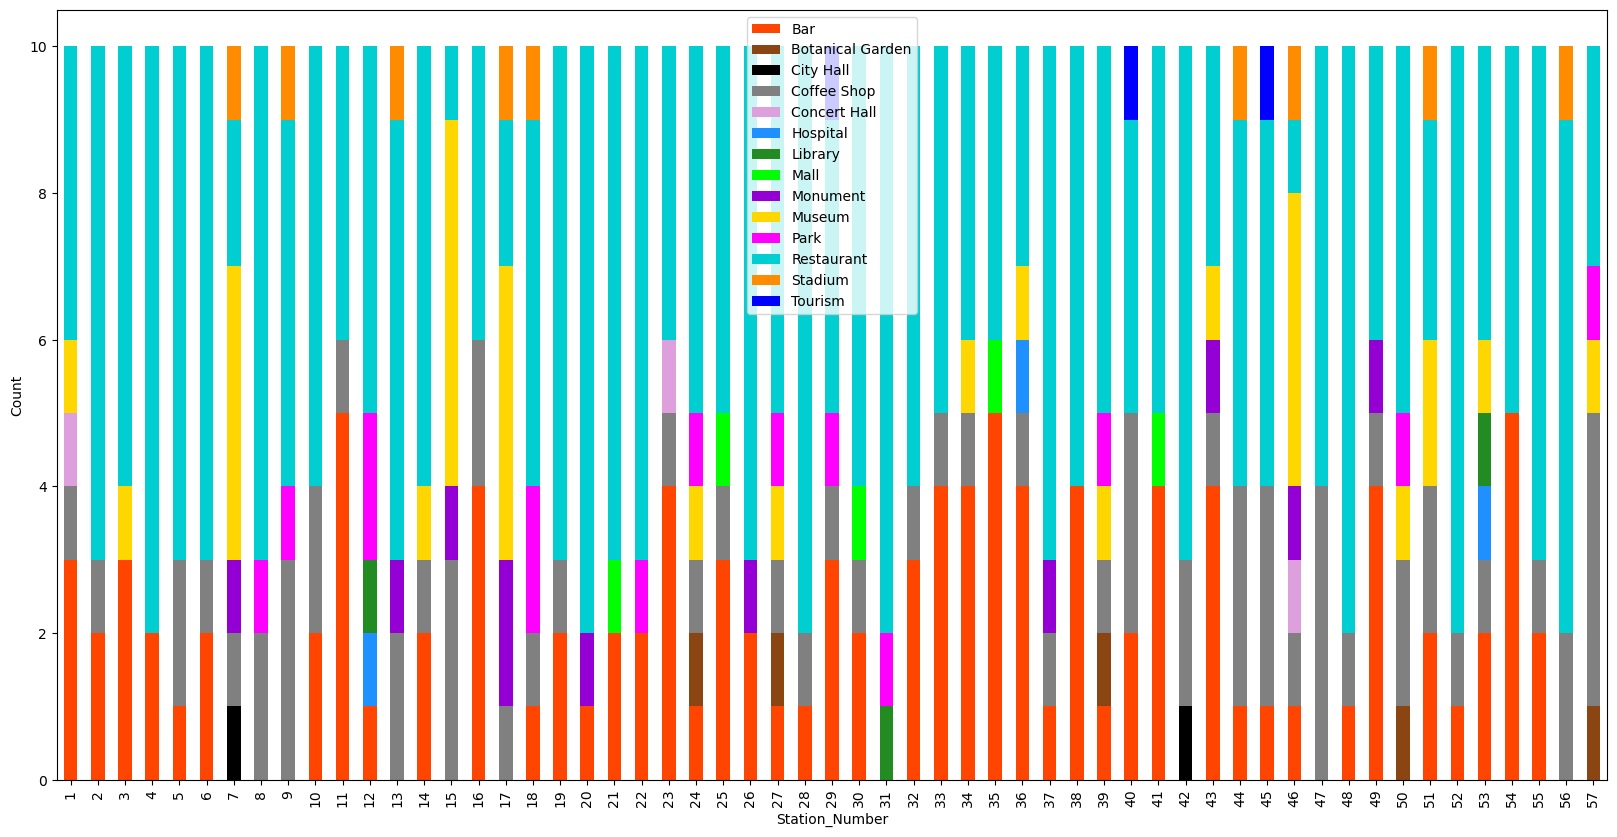

In [38]:
colours = ['orangered','saddlebrown','black','grey','plum','dodgerblue','forestgreen',
    'lime','darkviolet','gold','fuchsia','darkturquoise','darkorange','blue']

vis8.plot(kind='bar', stacked=True, color=colours,figsize=(20,10))
plt.ticklabel_format(style='plain',useOffset=False, axis='y')
plt.gca().set_ylabel("Count")

plt.savefig('C:/Users/mebar/Documents/LHL-DataSci/Projects/python-project-datasci/images/location_types_per_station.png')

This makes it VERY clear that there are SO many restaurants, and also a lot of bars. I am still not sure how there are two City Halls.<p>
Also, 14 colours is officially too many. I have regrets.

# Database

**Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)**

In [39]:
import sqlite3
from sqlite3 import Error

In [40]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [41]:
create_connection('C:/Users/mebar/Documents/LHL-DataSci/Projects/python-project-datasci/data/python_project.sqlite')

Connection to SQLite DB successful


In [42]:
connection = create_connection('C:/Users/mebar/Documents/LHL-DataSci/Projects/python-project-datasci/data/python_project.sqlite')

Connection to SQLite DB successful


In [43]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")


In [44]:
create_bikes_table = """
CREATE TABLE IF NOT EXISTS bike_stations (
    station_id TEXT PRIMARY KEY,
    name TEXT,
    latitude VARCHAR(9),
    longitude VARCHAR(9),
    timestamp CHAR(27),
    free_bikes INT,
    empty_slots INT,
    uid NUMERIC,
    number INT,
    slots INT, 
    bike_uids TEXT 
);
"""

In [45]:
execute_query(connection, create_bikes_table)

Query executed successfully


In [46]:
create_foursquare_table = """
CREATE TABLE IF NOT EXISTS foursquare_locations (
    fsq_id TEXT NOT NULL,
    station_num INT NOT NULL,
    distance INT, 
    name TEXT, 
    location_address TEXT,
    categorized VARCHAR(17),
    closed_bucket VARCHAR(15),
    PRIMARY KEY (fsq_id, station_num)
);
"""

In [47]:
execute_query(connection, create_foursquare_table)

Query executed successfully


In [48]:
create_yelp_table = """
CREATE TABLE IF NOT EXISTS yelp_locations (
    Station_No INT NOT NULL,
    Business_ID TEXT NOT NULL,
    Business_Name TEXT,
    Category TEXT,
    Review_Count INT,
    Rating INT, 
    Phone_No VARCHAR(12),
    Address TEXT,
    Distance FLOAT,
    Business_Hours TEXT,
    PRIMARY KEY (Station_No, Business_Name)
);
"""

In [49]:
execute_query(connection, create_yelp_table)

Query executed successfully


**Look at the data before and after the join to validate your data.**

In [50]:
print('bikes table =', bikes.shape)
print('locations table =', locations.shape)
print('combined table =', joined.shape)
print('number of stations =',bikes['station_id'].count())
print('total locations returned =', locations['fsq_id'].count())
print('unique locations returned =', locations['fsq_id'].drop_duplicates().count())
print('unique stations in locations =', locations['station_num'].drop_duplicates().count())
print('unique stations after join =', joined['Station_Number'].drop_duplicates().count())
print('unique locations after join =', joined['fsq_id'].drop_duplicates().count())
print('unique combos of station + location = ', (joined[['Station_Number','fsq_id']].drop_duplicates().count()))
print('locations on station 1 =', locations[locations['station_num']==1]['fsq_id'].count())


bikes table = (57, 13)
locations table = (570, 7)
combined table = (570, 18)
number of stations = 57
total locations returned = 570
unique locations returned = 218
unique stations in locations = 57
unique stations after join = 57
unique locations after join = 218
unique combos of station + location =  Station_Number    570
fsq_id            570
dtype: int64
locations on station 1 = 10


Station number was able to be a primary key during the SQLite phase, so we know that's a safe column. The station number stays consistent in the locations(foursquare) table, and after the join. The number of unique locations also does not change, and that forms the other half of the primary key for the locations(foursquare) table going into SQLite. The total number of returns with redundancy also stays stable, being the ten per station returned by the API as a default. 

In [51]:
print('yelp locations table =', yelp.shape)
print('unique stations in yelp =', yelp['Station_No'].drop_duplicates().count())
print('total locations returned =', yelp['Business_ID'].count())
print('unique locations returned =', yelp['Business_ID'].drop_duplicates().count())
print('locations on station 1 =', yelp[yelp['Station_No']==1]['Business_ID'].count())

yelp locations table = (1140, 11)
unique stations in yelp = 57
total locations returned = 1140
unique locations returned = 393
locations on station 1 = 20


Yelp had a lot more individual returns, with 20 locations coming back per station, but also a lot more duplication. I don't have post-merge data for it because I didn't get it fully filtered, so there didn't seem to be much point in merging it. 

In [52]:
connection.close()